# ÖDEV 2 
# MEHMET ALTINTAŞ 1901022065

# ÖN HAZIRLIK KODLARI

# Hazır komut kullanmadan çıkış işaretini hesaplama

In [7]:
import numpy as np 
x = np.zeros(20) 
y = np.zeros(20) 

y[-1] = 0 
x[-1] = 0 

x[0] = 1 
x[1] = -1 

for n in range(0,4): 
    
    y[n] = -0.5*y[n-1]+x[n]+2*x[n-1] 
    
print(y[0:4])

[ 1.     0.5   -2.25   1.125]


# Hazır komut kullanarak çıkış işaretini hesaplama

In [10]:
from scipy import signal 
x=np.array([1,-1,0,0],dtype=float) 

b=[1,2] 
a=[1,0.5] 

y=signal.lfilter(b,a,x) 
print(y)

[ 1.     0.5   -2.25   1.125]


# Çıkış işaretinin grafiğini çizdirmek

Text(0.5, 0, 'n')

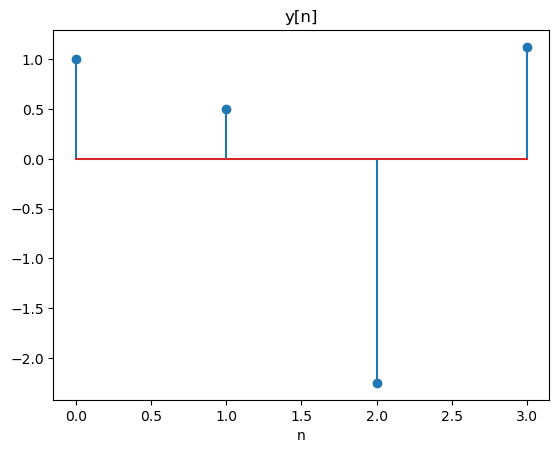

In [13]:
from matplotlib import pyplot as plt 
n=np.arange(0,4) 
plt.stem(n,y) 
plt.title('y[n]') 
plt.xlabel('n')

# Hazır fonksiyon kullanmadan konvolüsyon hesaplama

In [16]:
import numpy as np

x = np.array([1,2,-1],dtype=float)
h = np.array([1,3],dtype=float)

nXmin = 0
nHmin = 0

M = len(x)
N = len(h)
L = M + N -1

y = np.zeros(L)

for n in range(L):
    y[n] = 0
    for k in range(M):
         if(n-k)>=0 and (n-k)<N:
                 y[n] = y[n] + x[k]*h[n-k]

print(y)

[ 1.  5.  5. -3.]


In [18]:
nY = [i for i in range(nXmin+nHmin,nXmin+nHmin+L)]
print(nY)

[0, 1, 2, 3]


In [20]:
import numpy as np
x = np.array([1,0,2,-1],dtype=float)
h = np.array([1,0,0,0,3],dtype=float)
nXmin = -1
nHmin = -2

M = len(x)
N = len(h)
L = M+N-1
y =np.zeros(L)

for n in range (L):
    y[n]=0
    for k in range (M):
        if (n-k)>=0 and (n-k)<N:
            y[n]=y[n]+x[k]*h[n-k]

print(y)

nY = [i for i in range(nXmin+nHmin,nXmin+nHmin+L)]
print(nY)

[ 1.  0.  2. -1.  3.  0.  6. -3.]
[-3, -2, -1, 0, 1, 2, 3, 4]


Text(0.5, 1.0, 'y[n]')

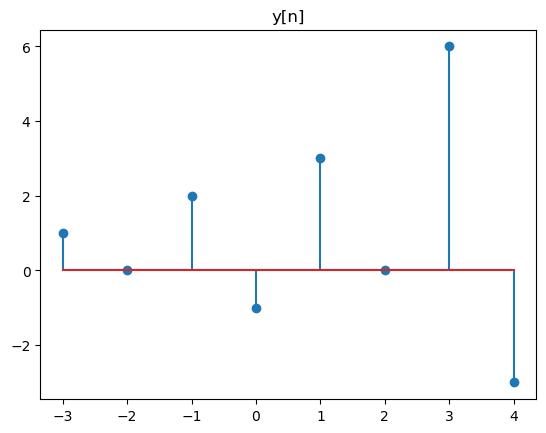

In [22]:
import matplotlib.pyplot as plt
plt.stem(nY,y)
plt.title('y[n]')

# Hazır komut kullanarak konvolüsyon hesaplama

In [28]:
import numpy as np 
from scipy import signal 

x=np.array([1,2,-1],dtype=float) 
h=np.array([1,3],dtype=float) 

print(np.convolve(x,h)) 
print(signal.convolve(x,h))

[ 1.  5.  5. -3.]
[ 1.  5.  5. -3.]


# SORU 1

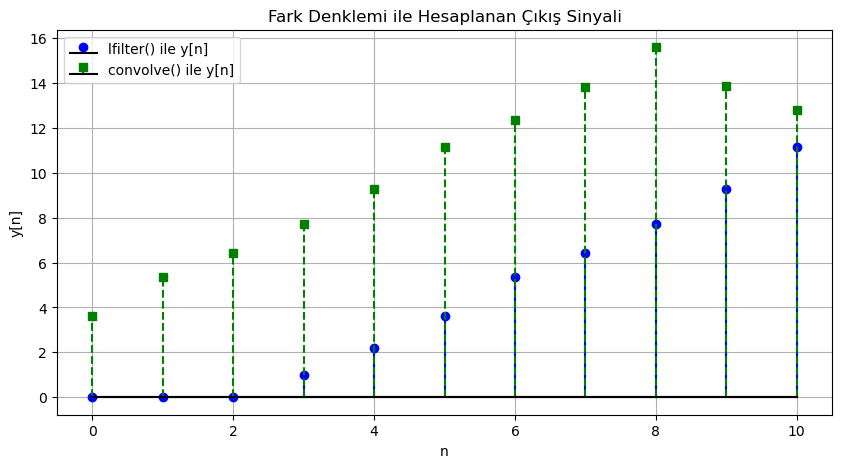

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, convolve

# Sistem katsayıları
b = [1, 0, 0, 0, -1]  # x[n] - x[n-4]
a = [1, -1.2]         # y[n] - 1.2*y[n-1]

# n=0,1,...,10 aralığı için zaman dizisi
n = np.arange(0, 11)

# x[n] = u[n-3]: n<3 için 0, n>=3 için 1
x = np.where(n >= 3, 1, 0)

# Yöntem 1: lfilter() kullanarak çıkışı hesaplama
y_lfilter = lfilter(b, a, x)

# Sistemin impuls cevabını elde etmek için delta (impuls) sinyali oluşturuluyor
delta = np.zeros(11)
delta[0] = 1
h = lfilter(b, a, delta)

# Yöntem 2: Convolution ile çıkış sinyalini elde etme (mode='same' ile giriş boyutunda sonuç)
y_conv = convolve(x, h, mode='same')

# Grafik çizimi
plt.figure(figsize=(10, 5))
plt.stem(n, y_lfilter, linefmt='b-', markerfmt='bo', basefmt='k', label='lfilter() ile y[n]')
plt.stem(n, y_conv, linefmt='g--', markerfmt='gs', basefmt='k', label='convolve() ile y[n]')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Fark Denklemi ile Hesaplanan Çıkış Sinyali')
plt.legend()
plt.grid(True)
plt.show()


# SORU 2

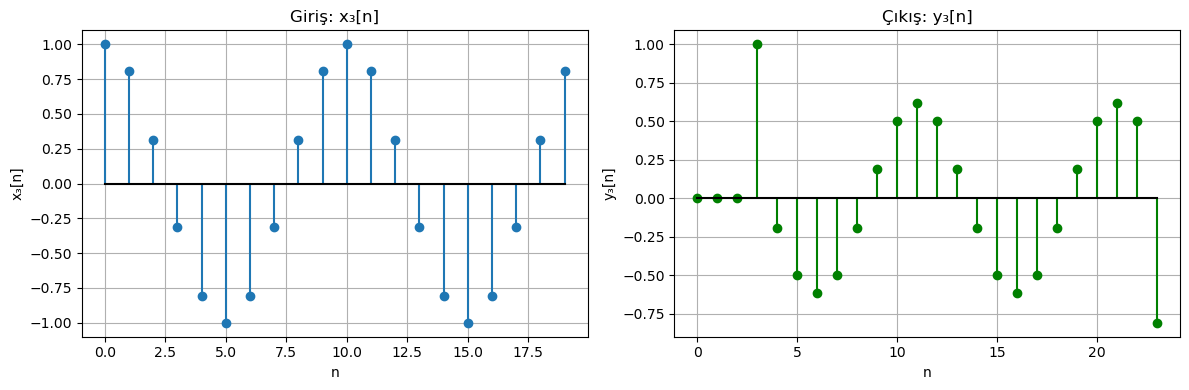

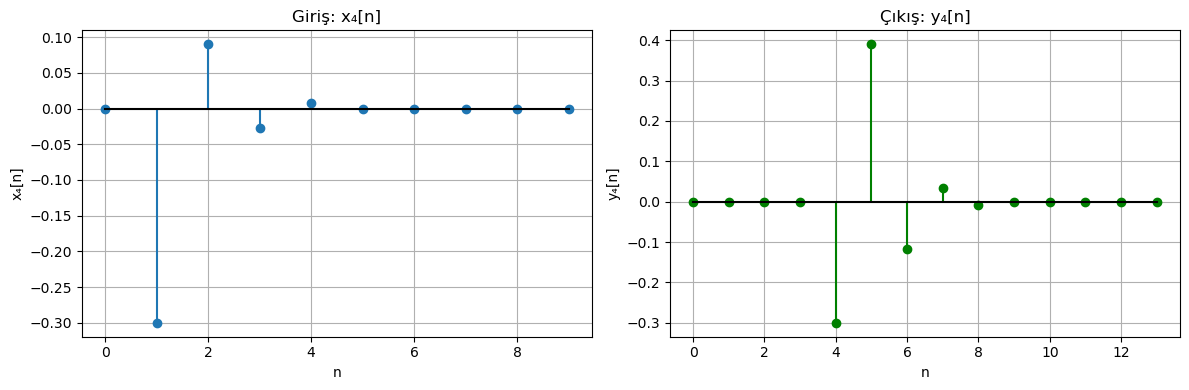

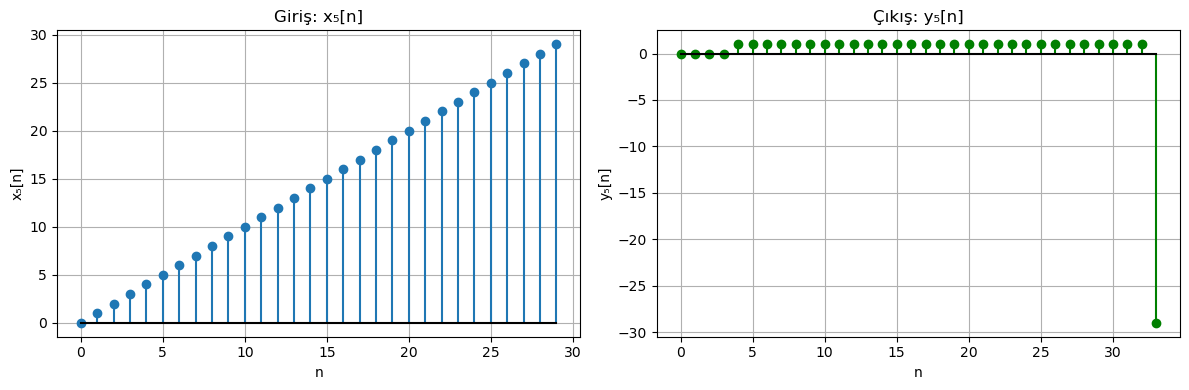

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Sistem 2'nin impuls cevabı: h2[n] = δ[n-3] - δ[n-4]
# h2 dizisi: indeksi 3'te 1, indeksi 4'te -1, diğerleri 0
h2 = np.zeros(5)
h2[3] = 1
h2[4] = -1

### (a) x3[n] = cos((pi/5)*n)*(u[n]-u[n-20])
n_a = np.arange(0, 20)  # n = 0,1,...,19 için
x3 = np.cos((np.pi/5) * n_a)

# Sistem çıkışı: y3[n] = x3[n-3] - x3[n-4] -> konvolüsyon yöntemiyle
y3 = convolve(x3, h2, mode='full')
n_y3 = np.arange(0, len(y3))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.stem(n_a, x3, basefmt="k")
plt.title('Giriş: x₃[n]')
plt.xlabel('n')
plt.ylabel('x₃[n]')
plt.grid(True)

plt.subplot(1,2,2)
plt.stem(n_y3, y3, linefmt='g-', markerfmt='go', basefmt="k")
plt.title('Çıkış: y₃[n]')
plt.xlabel('n')
plt.ylabel('y₃[n]')
plt.grid(True)
plt.tight_layout()
plt.show()


### (b) x4[n] = (-0.3)^n*(u[n-1]-u[n-5])
n_b = np.arange(0, 10)  # n = 0,1,...,9 aralığında inceleyelim
# u[n-1] ve u[n-5] için, karşılaştırma yaparak 0-1 değerini üretiyoruz
x4 = ((-0.3)**n_b) * (((n_b >= 1).astype(int)) - ((n_b >= 5).astype(int)))

y4 = convolve(x4, h2, mode='full')
n_y4 = np.arange(0, len(y4))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.stem(n_b, x4, basefmt="k")
plt.title('Giriş: x₄[n]')
plt.xlabel('n')
plt.ylabel('x₄[n]')
plt.grid(True)

plt.subplot(1,2,2)
plt.stem(n_y4, y4, linefmt='g-', markerfmt='go', basefmt="k")
plt.title('Çıkış: y₄[n]')
plt.xlabel('n')
plt.ylabel('y₄[n]')
plt.grid(True)
plt.tight_layout()
plt.show()


### (c) x5[n] = n * u[n]
n_c = np.arange(0, 30)  # n = 0,1,...,29
x5 = n_c  # u[n] için n>=0, dolayısıyla x5[n] = n

y5 = convolve(x5, h2, mode='full')
n_y5 = np.arange(0, len(y5))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.stem(n_c, x5, basefmt="k")
plt.title('Giriş: x₅[n]')
plt.xlabel('n')
plt.ylabel('x₅[n]')
plt.grid(True)

plt.subplot(1,2,2)
plt.stem(n_y5, y5, linefmt='g-', markerfmt='go', basefmt="k")
plt.title('Çıkış: y₅[n]')
plt.xlabel('n')
plt.ylabel('y₅[n]')
plt.grid(True)
plt.tight_layout()
plt.show()


# SORU 3

# Bu ödev sayesinde sinyal işleme sistemlerini teorik bilgilerle pratik uygulamalar arasında köprü kurarak daha iyi anladım. Fark denklemleri ve konvolüsyon işlemleri üzerinden sistem tepkilerini incelemek, ders notlarında öğrendiklerimi gerçek verilerle harmanlamama olanak sağladı. Python programlama ve Matplotlib kullanarak grafikler çizmek, sinyallerin davranışını görsel olarak yorumlama becerilerimi geliştirdi. Ayrıca, hata ayıklama sürecinde karşılaştığım problemleri çözerek analitik düşünme ve problem çözme yeteneklerimi güçlendirdim. Bu ödevin bana hem teknik bilgiyi pekiştirme hem de farklı yöntemleri karşılaştırma imkanı sunduğunu düşünüyorum.